<a href="https://colab.research.google.com/github/JonathanLehner/Colab-collection/blob/master/pyrender_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python 3

In [2]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl" #opengl seems to only work with TPU
!PYOPENGL_PLATFORM=egl python -c "from OpenGL import EGL"
print(os.environ['PYOPENGL_PLATFORM']) 


egl


In [11]:
# https://github.com/eduble/gl
!apt install libgl1-mesa-dri libegl1-mesa libgbm1
!pip install wheel
!pip install numpy
!pip install Cython
!git clone https://github.com/mcfletch/pyopengl.git
%cd pyopengl
!python setup.py develop
%cd accelerate
!python setup.py develop
%cd /content/

!pip install transforms3d

!wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/hand_mesh.stl
!wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/hand_mesh.obj
!wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/hand_mesh.obj.mtl
!wget https://github.com/JonathanLehner/Colab-collection/releases/download/MANO/hand_mesh_uv.jpg



Reading package lists... Done
Building dependency tree       
Reading state information... Done
libegl1-mesa is already the newest version (18.2.8-0ubuntu0~18.04.2).
libgbm1 is already the newest version (18.2.8-0ubuntu0~18.04.2).
libgl1-mesa-dri is already the newest version (18.2.8-0ubuntu0~18.04.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
fatal: destination path 'pyopengl' already exists and is not an empty directory.
/content/pyopengl
running develop
running egg_info
writing PyOpenGL.egg-info/PKG-INFO
writing dependency_links to PyOpenGL.egg-info/dependency_links.txt
writing top-level names to PyOpenGL.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'PyOpenGL.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.6/dist-packages/PyOpenGL.egg-link (link to .)
PyOpenGL 3.1.3

In [4]:
import OpenGL.GL as gl
print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 


None
None


In [8]:
# Install pyrender
!pip install pyrender

     |████████████████████████████████| 1.2MB 9.0MB/s 
  Using cached https://files.pythonhosted.org/packages/f2/00/6f332e63b33d24dc3761916e6d51402a7a82dd43c6ca8a96e24dda32c6b5/freetype_py-2.1.0.post1-py2.py3-none-manylinux1_x86_64.whl
     |████████████████████████████████| 1.7MB 53.0MB/s 
  Using cached https://files.pythonhosted.org/packages/d9/a4/8d5dd0fc4134b022b0f1e8f18ff6a96ffed9ad8c94375491308f8c123f20/trimesh-2.38.8.tar.gz
  Using cached https://files.pythonhosted.org/packages/96/3e/b1a3a39771d8452a89920b779678dbd9160634f38eee8a202c5696ed755e/pyglet-1.4.0b1-py2.py3-none-any.whl
  Stored in directory: /root/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Stored in directory: /root/.cache/pip/wheels/32/9e/43/7ce51a8cf8ef5d4e4f8906b3a4cf01c2d86e8ff9d01cf8caea
Successfully built networkx trimesh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: networ

In [9]:
# Load texture
from PIL import Image
import numpy as np
!wget -O texture_skin1.png https://i0.wp.com/3dtextures.me/wp-content/uploads/2016/05/material_218.png?zoom=2&resize=800%2C800&ssl=1
!wget -O texture_skin2.png https://i0.wp.com/3dtextures.me/wp-content/uploads/2019/01/material_692.png?zoom=2&resize=600%2C800&ssl=1
!wget -O texture.jpeg https://images.unsplash.com/photo-1552332271-fcd3c889767e?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1336&q=80
texture_image = Image.open("texture.jpeg")
np_im = np.array(texture_image)


--2019-05-06 22:23:02--  https://i0.wp.com/3dtextures.me/wp-content/uploads/2016/05/material_218.png?zoom=2
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216736 (212K) [image/png]
Saving to: ‘texture_skin1.png’

texture_skin1.png   100%[===================>] 211.66K  --.-KB/s    in 0.01s   

2019-05-06 22:23:02 (14.4 MB/s) - ‘texture_skin1.png’ saved [216736/216736]

--2019-05-06 22:23:04--  https://i0.wp.com/3dtextures.me/wp-content/uploads/2019/01/material_692.png?zoom=2
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106452 (104K) [image/png]
Saving to: ‘texture_skin2.png’

texture_skin2.png   100%[===================>] 103.96K  --.-KB/s    in 0.01s   

2019-05-06 22:23:04 (10.2 MB/s) - ‘texture_skin2.png’ saved [106452/106452]

--2019-05-06 22:23

In [12]:
import pyrender
import os
import numpy as np
import trimesh
import pyrender
import transforms3d
import OpenGL.GL as gl

'''my_texture = pyrender.Texture(name='skin', 
                           source=np_im, 
                           source_channels='RGB', 
                           width=200, 
                           height=200, 
                           #tex_type=gl.GL_TEXTURE_2D, 
                           #data_format=gl.GL_FLOAT
                           )'''
# program is broken

"my_texture = pyrender.Texture(name='skin', \n                           source=np_im, \n                           source_channels='RGB', \n                           width=200, \n                           height=200, \n                           #tex_type=gl.GL_TEXTURE_2D, \n                           #data_format=gl.GL_FLOAT\n                           )"

In [0]:
from pyrender.material import MetallicRoughnessMaterial #MetallicRoughnessMaterial
my_material = MetallicRoughnessMaterial(  #cannot be called material or import error
    alphaMode='BLEND'
)

In [16]:
!pwd
%cd /content/
  
# Load the hand trimesh and put it in a scene
hand_trimesh = trimesh.load('hand_mesh.stl')
mesh = pyrender.Mesh.from_trimesh(hand_trimesh, material=my_material, smooth=True) #, material

/content


face_normals didn't match triangles, ignoring!


/content


In [17]:
scene = pyrender.Scene(bg_color=[0.8, 0.8, 1.0, 0.0])
scene.add(mesh, pose=np.eye(4))


In [18]:
print(mesh)


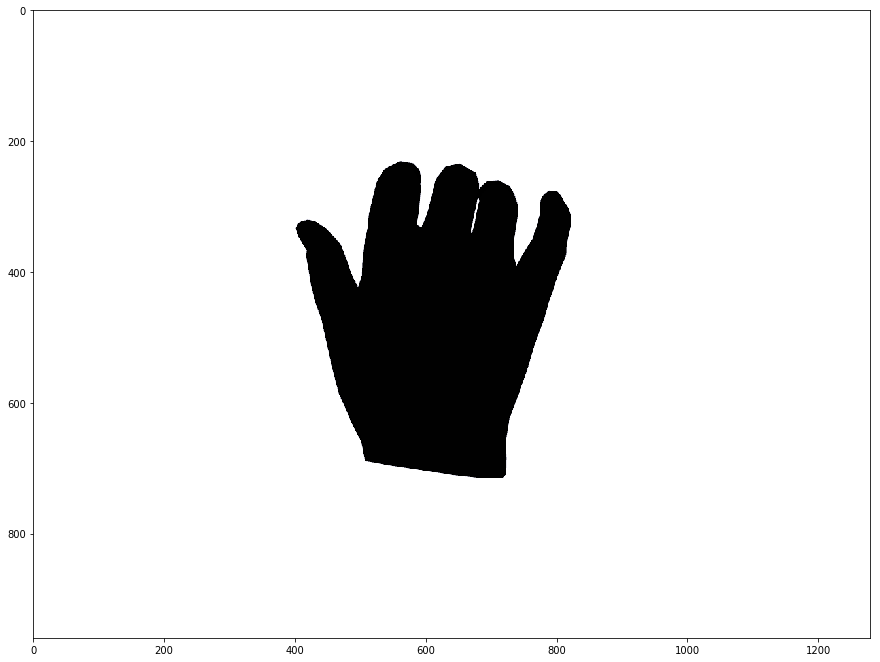

In [19]:
from matplotlib import pyplot as plt

# Set up the camera -- z-axis away from the scene, x-axis right, y-axis up
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
#camera = pyrender.OrthographicCamera(xmag=1.0, ymag=1.0)

# look at the hand from a certain distance
# rotate to view the hand from a different angle

rotation = transforms3d.euler.euler2mat(0, np.pi/2, np.pi/2, axes='sxyz') # in tutorial matrix it is np.pi/4, 0, np.pi/2,
#print(rotation)  # np.pi/2
# translations
T = [[1.0, 0.0, 0.0, 0.0],
     [0.0, 1.0, 0.0, 0.0],
     [0.0, 0.0, 1.0, 250.0],
     [0.0, 0.0, 0.0, 1.0]]
Z = [1.0, 1.0, 1.0] # zooms
B = transforms3d.affines.compose([45.0, 0.0, 0.0], rotation, Z) # applies translation last
camera_pose = np.matmul(B, T)
# print(camera_pose)
# print("test")

scene.add(camera, pose=camera_pose)

# Set up the light -- a single spot light in the same spot as the camera
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                               innerConeAngle=np.pi/16.0)
scene.add(light, pose=camera_pose)

# Render the scene
r = pyrender.OffscreenRenderer(640*2, 480*2)
flags = pyrender.RenderFlags.RGBA | pyrender.RenderFlags.OFFSCREEN
color, depth = r.render(scene, flags=flags)


plt.figure(figsize=(15,15))
plt.axis('on')
plt.imshow(color)

# print(color)

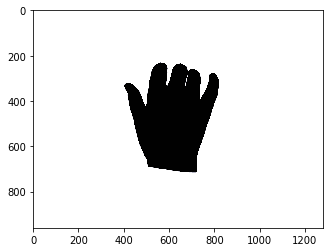

In [20]:
plt.imshow(color)


In [0]:
# download background images dataset
# !wget http://groups.csail.mit.edu/vision/datasets/ADE20K/ADE20K_2016_07_26.zip
# !unzip ADE20K_2016_07_26.zip

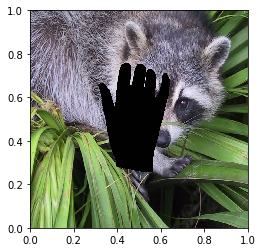

In [22]:
# show rendered hand in front of a random background image
# source: https://stackoverflow.com/questions/34495817/plotting-a-background-image-to-a-matplotlib-graph
from matplotlib import pyplot as plt
from scipy.misc import face
import numpy as np

fig, ax = plt.subplots(1, 1)

background = ax.imshow(face(), cmap=plt.cm.gray, extent=[0, 1, 0, 1])
image = ax.imshow(color, extent=[0, 1, 0, 1])

plt.show()